# IMC Round 4

## Magnificent Macaron

### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import jsonpickle
import math
from typing import Any, Dict, List
from datamodel import (
    Listing, Observation, Order, OrderDepth,
    ProsperityEncoder, Symbol, Trade, TradingState
)

import matplotlib.pyplot as plt

macaron = pd.read_csv('macaron_with_observations.csv')
macaron

,full_timestamp,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,...,ask_volume_3,mid_price,profit_and_loss,bakery_bidPrice,bakery_askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,1000000,1,0,MAGNIFICENT_MACARONS,624,20,622,12,617,23,...,12,627.5,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00
1,1000100,1,100,MAGNIFICENT_MACARONS,627,14,625,12,620,21,...,12,630.5,0,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00
2,1000200,1,200,MAGNIFICENT_MACARONS,627,10,625,15,620,21,...,15,630.5,0,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00
3,1000300,1,300,MAGNIFICENT_MACARONS,629,14,627,14,622,26,...,14,632.5,0,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01
4,1000400,1,400,MAGNIFICENT_MACARONS,628,18,625,16,620,26,...,16,631.5,0,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,4999500,4,999500,MAGNIFICENT_MACARONS,742,10,740,14,735,21,...,14,745.5,0,745.0,746.5,1.6,7.5,-4.0,206.028012,59.94
39996,4999600,4,999600,MAGNIFICENT_MACARONS,738,12,736,12,731,28,...,12,741.5,0,741.0,742.5,1.6,7.5,-4.0,205.991170,59.95
39997,4999700,4,999700,MAGNIFICENT_MACARONS,742,18,740,16,735,29,...,16,745.5,0,744.5,746.0,1.6,7.5,-4.0,206.053141,59.96
39998,4999800,4,999800,MAGNIFICENT_MACARONS,741,10,739,20,734,27,...,20,744.5,0,744.0,745.5,1.6,7.5,-4.0,205.751795,59.98


In [2]:
macaron['island_best_bid'] = np.maximum(macaron['bid_price_1'], macaron['bid_price_2'], macaron['bid_price_3'])
macaron['island_best_ask'] = np.minimum(macaron['ask_price_1'], macaron['ask_price_2'], macaron['ask_price_3'])
macaron['effective_bakery_buy'] = macaron['bakery_askPrice'] + macaron['transportFees'] + macaron['importTariff']
macaron['effective_bakery_sell'] = macaron['bakery_bidPrice'] - macaron['transportFees'] - macaron['exportTariff']
macaron['island_mid_price'] = (macaron['island_best_bid'] + macaron['island_best_ask']) / 2
macaron['bakery_mid_price'] = (macaron['bakery_bidPrice'] + macaron['bakery_askPrice']) / 2
macaron.head()

/var/folders/3q/pn6kdbkn0xgb8djtj70vttcw0000gn/T/ipykernel_97167/2229956471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macaron['island_best_bid'] = np.maximum(macaron['bid_price_1'], macaron['bid_price_2'], macaron['bid_price_3'])
/var/folders/3q/pn6kdbkn0xgb8djtj70vttcw0000gn/T/ipykernel_97167/2229956471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macaron['island_best_ask'] = np.minimum(macaron['ask_price_1'], macaron['ask_price_2'], macaron['ask_price_3'])


,full_timestamp,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,...,exportTariff,importTariff,sugarPrice,sunlightIndex,island_best_bid,island_best_ask,effective_bakery_buy,effective_bakery_sell,island_mid_price,bakery_mid_price
0,1000000,1,0,MAGNIFICENT_MACARONS,624,20,622,12,624,23,...,9.0,-3.0,200.000000,60.00,624,631,626.5,617.0,627.5,627.75
1,1000100,1,100,MAGNIFICENT_MACARONS,627,14,625,12,627,21,...,9.0,-3.0,200.098445,60.00,627,634,629.5,620.0,630.5,630.75
2,1000200,1,200,MAGNIFICENT_MACARONS,627,10,625,15,627,21,...,9.0,-3.0,200.103915,60.00,627,634,629.5,620.0,630.5,630.75
3,1000300,1,300,MAGNIFICENT_MACARONS,629,14,627,14,629,26,...,9.0,-3.0,200.352462,60.01,629,636,631.5,622.0,632.5,632.75
4,1000400,1,400,MAGNIFICENT_MACARONS,628,18,625,16,628,26,...,9.0,-3.0,200.201545,60.01,628,635,630.0,620.5,631.5,631.25


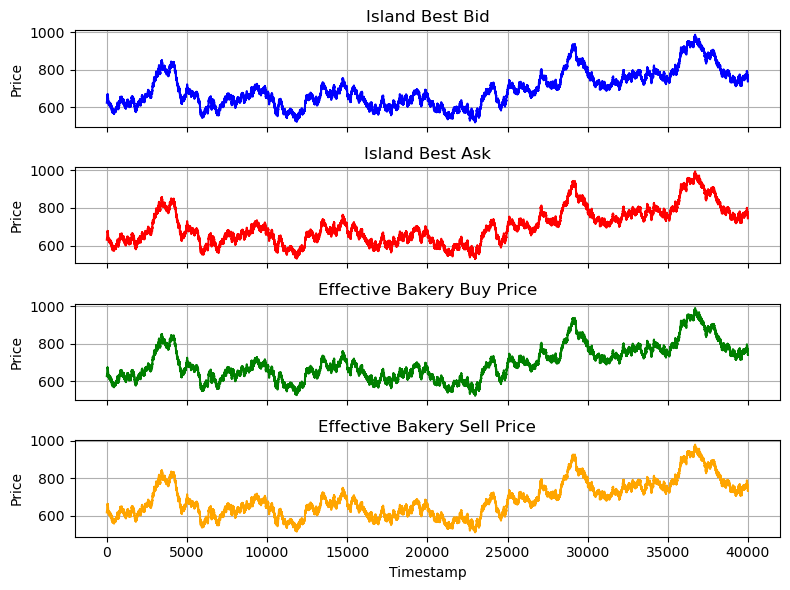

In [3]:
fig, axs = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# 1. Island best bid
axs[0].plot(macaron['island_best_bid'], color='blue')
axs[0].set_title('Island Best Bid')
axs[0].set_ylabel('Price')
axs[0].grid(True)

# 2. Island best ask
axs[1].plot(macaron['island_best_ask'], color='red')
axs[1].set_title('Island Best Ask')
axs[1].set_ylabel('Price')
axs[1].grid(True)

# 3. Effective Bakery Buy
axs[2].plot(macaron['effective_bakery_buy'], color='green')
axs[2].set_title('Effective Bakery Buy Price')
axs[2].set_ylabel('Price')
axs[2].grid(True)

# 4. Effective Bakery Sell
axs[3].plot(macaron['effective_bakery_sell'], color='orange')
axs[3].set_title('Effective Bakery Sell Price')
axs[3].set_ylabel('Price')
axs[3].set_xlabel('Timestamp')
axs[3].grid(True)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


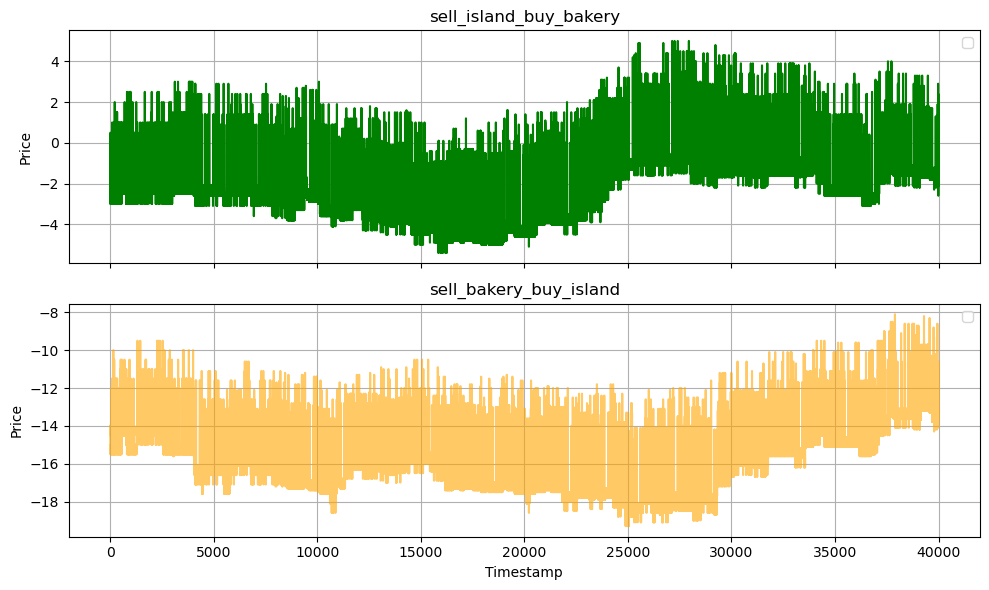

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

sell_island_buy_bakery = macaron['island_best_bid'] - macaron['effective_bakery_buy'] 
# 1. Compare Island Best Bid vs Effective Bakery Buy
axs[0].plot(sell_island_buy_bakery, color='green', alpha=1)
axs[0].set_title('sell_island_buy_bakery')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

sell_bakery_buy_island = macaron['effective_bakery_sell'] - macaron['island_best_ask']
# 2. Compare Island Best Ask vs Effective Bakery Sell
axs[1].plot(sell_bakery_buy_island, color='orange', alpha=0.6)
axs[1].set_title('sell_bakery_buy_island')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Timestamp')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Average Bakery Mid Price between timestamps 5000 and 25000: 633.99


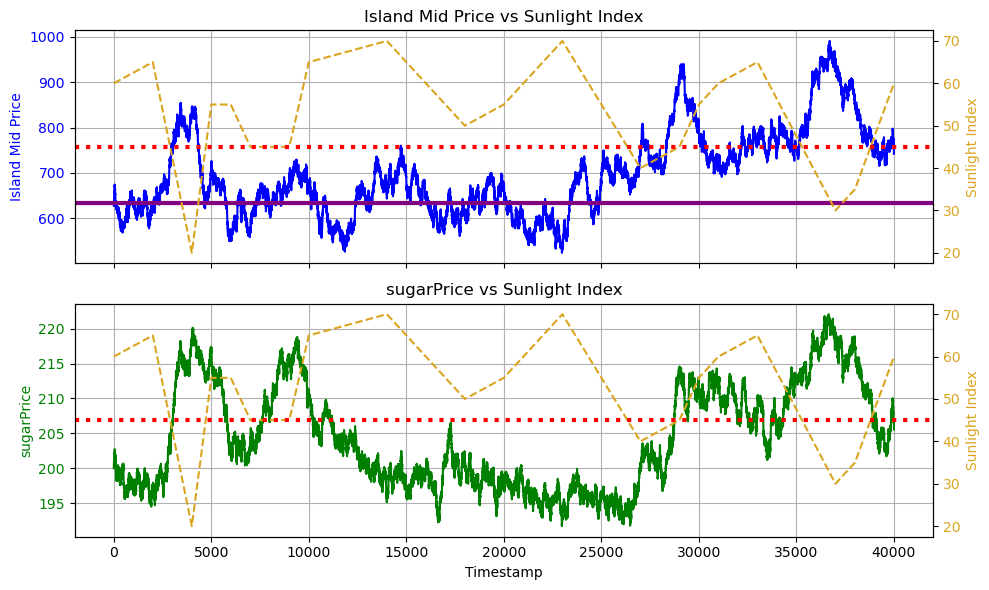

In [5]:
# Slice the DataFrame between timestamps 5000 and 25000
filtered = macaron.loc[5000:25000, 'bakery_mid_price']

# Compute the average
average_bakery_mid_price = filtered.mean()

print(f"Average Bakery Mid Price between timestamps 5000 and 25000: {average_bakery_mid_price:.2f}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# --- Plot 1: Island Mid Price vs Sunlight Index ---
ax1.plot(macaron['island_mid_price'], label='Island Mid Price', color='blue')
ax1.axhline(y=633.99, color='purple', linestyle='-', linewidth=3)  # Horizontal reference line
ax1.set_ylabel('Island Mid Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Island Mid Price vs Sunlight Index')
ax1.grid(True)

ax1b = ax1.twinx()
ax1b.plot(macaron['sunlightIndex'], label='Sunlight Index', color='goldenrod', linestyle='--')
ax1b.axhline(y=45, color='red', linestyle=':', linewidth=3)  # Horizontal reference line
ax1b.set_ylabel('Sunlight Index', color='goldenrod')
ax1b.tick_params(axis='y', labelcolor='goldenrod')

# --- Plot 2: Bakery Mid Price vs Sunlight Index ---
ax2.plot(macaron['sugarPrice'], label='Bakery Mid Price', color='green')
ax2.set_ylabel('sugarPrice', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_title('sugarPrice vs Sunlight Index')
ax2.set_xlabel('Timestamp')
ax2.grid(True)

ax2b = ax2.twinx()
ax2b.plot(macaron['sunlightIndex'], label='Sunlight Index', color='goldenrod', linestyle='--')
ax2b.axhline(y=45, color='red', linestyle=':', linewidth=3)  # Horizontal reference line
ax2b.set_ylabel('Sunlight Index', color='goldenrod')
ax2b.tick_params(axis='y', labelcolor='goldenrod')

plt.tight_layout()
plt.show()

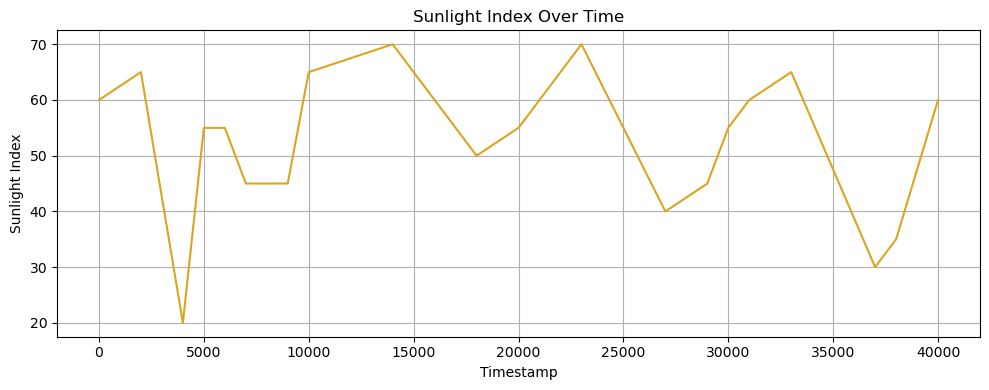

In [6]:
plt.figure(figsize=(10, 4))

plt.plot(macaron['sunlightIndex'], color='goldenrod')
plt.title('Sunlight Index Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sunlight Index')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Drop missing values to ensure aligned data
corr_df = macaron[['island_mid_price', 'bakery_mid_price', 'sunlightIndex']].dropna()

# Calculate correlations
island_corr = corr_df['island_mid_price'].corr(corr_df['sunlightIndex'])
bakery_corr = corr_df['bakery_mid_price'].corr(corr_df['sunlightIndex'])

print(f"Correlation between Island Mid Price and Sunlight Index: {island_corr:.4f}")
print(f"Correlation between Bakery Mid Price and Sunlight Index: {bakery_corr:.4f}")

Correlation between Island Mid Price and Sunlight Index: -0.6050
Correlation between Bakery Mid Price and Sunlight Index: -0.6050


In [8]:
macaron['sunlightIndex'].mean()

53.875500249999995

In [9]:
# Slice the DataFrame between timestamps 5000 and 25000
filtered = macaron.loc[5000:25000, 'bakery_mid_price']

# Compute the average
average_bakery_mid_price = filtered.mean()

print(f"Average Bakery Mid Price between timestamps 5000 and 25000: {average_bakery_mid_price:.2f}")


Average Bakery Mid Price between timestamps 5000 and 25000: 633.99


## Magnificent Macaron Trading Strategy

In [ ]:
import jsonpickle
import math
from typing import Any, Dict, List, Tuple
import numpy as np
import pandas as pd
from datamodel import (
    Listing, Observation, ConversionObservation, Order, OrderDepth,
    ProsperityEncoder, Symbol, Trade, TradingState
)

PARAMS = {
    "MAGNIFICENT_MACARONS": {
        "position_limit": 75,
        "conversion_limit": 10,
        "take_width": 1.5,
        "clear_width": 1,
        "disregard_edge": 0.5,
        "join_edge": 2,
        "default_edge": 0.5,
        "soft_position_limit": 50,
        "adverse_volume": 12,
        "CriticalSunlightIndex": 45, 
    }
}

# --- MAGNIFICENT MACARON STRATEGY ---
class MagnificentMacaronStrategy:
    def __init__(self, symbol: str, params: dict):
        self.symbol = symbol
        self.params = params
        self.cash = 0
        self.last_fair = None
        self.sunlight_history = []
        self.prev_slope = None  # Track previous slope for detecting trend reversal

    def get_fair_price(self, order_depth: OrderDepth, sunlightIndex: float) -> float:
        p = self.params
        bids = order_depth.buy_orders
        asks = order_depth.sell_orders
    
        if not bids or not asks:
            return self.last_fair if self.last_fair is not None else 0.0
    
        island_mid_price = (max(bids) + min(asks)) / 2
    
        # If sunlight is strong, just use mid price directly
        if sunlightIndex > p["CriticalSunlightIndex"]:
            fair = island_mid_price
        else:
            if self.last_fair is not None:
                fair = island_mid_price + p["reversion_beta"] * (island_mid_price - self.last_fair)
            else:
                fair = island_mid_price
    
        self.last_fair = fair
        return fair

    def run(self, state: TradingState) -> List[Order]:
        p = self.params
        obs = state.observations.conversionObservations[self.symbol]
        sunlightIndex = obs.sunlightIndex
        order_depth = state.order_depths[self.symbol]
    
        bids = sorted(order_depth.buy_orders.items(), reverse=True)
        asks = sorted(order_depth.sell_orders.items())
        position = state.position.get(self.symbol, 0)
        orders = []
    
        max_buy = HARD_POSITION_LIMIT - position
        max_sell = HARD_POSITION_LIMIT + position
    
        # --- Fair price logic using sunlightIndex ---
        fair = self.get_fair_price(order_depth, sunlightIndex)
    
        # --- Sunlight slope tracking ---
        self.sunlight_history.append(sunlightIndex)
        if len(self.sunlight_history) > 10:
            self.sunlight_history.pop(0)
    
        slope = None
        if len(self.sunlight_history) >= 3:
            y = np.array(self.sunlight_history)
            x = np.arange(len(y))
            slope, _ = np.polyfit(x, y, 1)
    
        # --- BUY if sunlightIndex is low ---
        if self.prev_slope is not None and slope is not None:
            if sunlightIndex <= p["CriticalSunlightIndex"] and self.prev_slope <= 0 and asks:
                best_ask, ask_vol = asks[0]
                buy_qty = min(-ask_vol, max_buy)
                if buy_qty > 0:
                    orders.append(Order(self.symbol, best_ask, buy_qty))
        
        # --- SELL if slope reverses from negative to positive ---
        if self.prev_slope is not None and slope is not None:
            if self.prev_slope <= 0 and slope > 0 and bids:
                best_bid, bid_vol = bids[0]
                sell_qty = min(bid_vol, max_sell)
                if sell_qty > 0:
                    orders.append(Order(self.symbol, best_bid, -sell_qty))
    
        self.prev_slope = slope  # update slope
    
        # --- TAKE orders ---
        for ask, vol in asks:
            if ask < fair - p["take_width"] and max_buy > 0:
                qty = min(-vol, max_buy)
                orders.append(Order(self.symbol, ask, qty))
                max_buy -= qty
    
        for bid, vol in bids:
            if bid > fair + p["take_width"] and max_sell > 0:
                qty = min(vol, max_sell)
                orders.append(Order(self.symbol, bid, -qty))
                max_sell -= qty
    
        # --- CLEAR orders ---
        position_after_take = position + (HARD_POSITION_LIMIT - max_buy) - (HARD_POSITION_LIMIT - max_sell)
        ask_clear = round(fair + p["clear_width"])
        bid_clear = round(fair - p["clear_width"])
    
        if position_after_take > 0:
            qty = min(position_after_take, max_sell)
            if qty > 0:
                orders.append(Order(self.symbol, ask_clear, -qty))
                max_sell -= qty
    
        if position_after_take < 0:
            qty = min(-position_after_take, max_buy)
            if qty > 0:
                orders.append(Order(self.symbol, bid_clear, qty))
                max_buy -= qty
    
        # --- MARKET MAKING ---
        bid_quote = round(fair - p["default_edge"])
        ask_quote = round(fair + p["default_edge"])
    
        if bids:
            best_bid = bids[0][0]
            if best_bid < fair - p["disregard_edge"]:
                bid_quote = best_bid + 1 if fair - best_bid > p["join_edge"] else best_bid
    
        if asks:
            best_ask = asks[0][0]
            if best_ask > fair + p["disregard_edge"]:
                ask_quote = best_ask - 1 if best_ask - fair > p["join_edge"] else best_ask
    
        # Position-based adjustment
        if position > p["soft_position_limit"]:
            ask_quote -= 1
        elif position < -p["soft_position_limit"]:
            bid_quote += 1
    
        mm_buy_qty = min(p["soft_position_limit"] - position, max_buy)
        mm_sell_qty = min(p["soft_position_limit"] + position, max_sell)
    
        if mm_buy_qty > 0:
            orders.append(Order(self.symbol, bid_quote, mm_buy_qty))
        if mm_sell_qty > 0:
            orders.append(Order(self.symbol, ask_quote, -mm_sell_qty))
    
        # --- PnL Tracking ---
        for trade in state.own_trades.get(self.symbol, []):
            self.cash += trade.quantity * (trade.price if trade.seller == "SUBMISSION" else -trade.price)
    
        mid = (bids[0][0] + asks[0][0]) / 2 if bids and asks else fair
        pnl = self.cash + position * mid
        logger.print(f"[{state.timestamp}] {self.symbol} | Fair: {fair:.2f} | Pos: {position} | PnL: {pnl:.2f}")
    
        return orders

    def save(self):
        return {"cash": self.cash, "last_fair": self.last_fair, "prev_slope": self.prev_slope}

    def load(self, data):
        self.cash = data.get("cash", 0)
        self.last_fair = data.get("last_fair", None)
        self.prev_slope = data.get("prev_slope", None)